Hunter Bennett  
Glass Lab  
Created 171128 | Last updated 171128  
____________  
This notebook explores our rnasequencing data for the three strains of mice. both at teh whole liver level and Kupffer cell specific level

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
import subprocess
import os
import sys
import glob
import re

# import user defined packages
sys.path.insert(0, '/home/h1bennet/scripts')
import hbUtils

# plot matplotlib plots in notebook
%matplotlib inline

# load extension for running R from python
%load_ext rpy2.ipython

In [2]:
# define path to data
datapath = {'liver':'/data/mm10/Liver/RNA/', 'kupffer':'/data/mm10/Kupffer/RNA/'}

# define output directory
outdir = '/home/h1bennet/liverStrains/results/171129_RNA_Seq'
if not os.path.isdir(outdir):
    subprocess.call(['mkdir', outdir])

# define samples for both whole liver and kupffer
samples = {'liver':['aj_WholeLiver_RNA_polyA_AMLNDiet_30week_AJ3A_JSS_TDT_16_09_26.aj.star_shifted_from_AJ.sam',
'aj_WholeLiver_RNA_polyA_AMLNDiet_30week_AJ3B_JSS_TDT_16_09_26.aj.star_shifted_from_AJ.sam',
'aj_WholeLiver_RNA_polyA_AMLNDiet_30week_AJ3C_JSS_TDT_16_09_28.aj.star_shifted_from_AJ.sam',
'aj_WholeLiver_RNA_polyA_ControlDiet_30week_AJ1A_JSS_TDT_16_09_26.aj.star_shifted_from_AJ.sam',
'aj_WholeLiver_RNA_polyA_ControlDiet_30week_AJ1B_JSS_TDT_16_09_26.aj.star_shifted_from_AJ.sam',
'aj_WholeLiver_RNA_polyA_ControlDiet_30week_AJ1C_JSS_TDT_16_09_28.aj.star_shifted_from_AJ.sam',
'balbc_WholeLiver_RNA_polyA_AMLNDiet_30week_BALB3A_JSS_TDT_16_09_28.balbcj.star_shifted_from_BALBCJ.sam',
'balbc_WholeLiver_RNA_polyA_AMLNDiet_30week_BALB3B_JSS_TDT_16_09_26.balbcj.star_shifted_from_BALBCJ.sam',
'balbc_WholeLiver_RNA_polyA_AMLNDiet_30week_BALB3C_TDT_JSS_16_09_26.balbcj.star_shifted_from_BALBCJ.sam',
'balbc_WholeLiver_RNA_polyA_AMLNDiet_30week_BALB3D_TDT_JSS_16_09_28.balbcj.star_shifted_from_BALBCJ.sam',
'balbc_WholeLiver_RNA_polyA_ControlDiet_30week_BALB1A_JSS_TDT_16_09_26.balbcj.star_shifted_from_BALBCJ.sam',
'balbc_WholeLiver_RNA_polyA_ControlDiet_30week_BALB1B_JSS_TDT_16_09_26.balbcj.star_shifted_from_BALBCJ.sam',
'balbc_WholeLiver_RNA_polyA_ControlDiet_30week_BALB1C_JSS_TDT_16_09_28.balbcj.star_shifted_from_BALBCJ.sam',
'NCoRWT_WholeLiver_RNA_polyA_AMLNDiet_30week_LN136C_JSS_TDT_16_09_19',
'NCoRWT_WholeLiver_RNA-polyA-AMLNDiet-30week-LN141A-JSS-TDT-16-09-21',
'NCoRWT_WholeLiver_RNA-polyA-ControlDiet-30week-LN134B-JSS-TDT-16-09-21',
'NCoRWT_WholeLiver_RNA-polyA-ControlDiet-30week-LN134C-JSS-TDT-16-09-19',
'NCoRWT_WholeLiver_RNA_polyA_ControlDiet_30week_LN134D_JSS_TDT_16_09_21'],
'kupffer':["aj_KupfferTotal_RNA_polyA_AMLNDiet_30week_AJ3A_JSSTDT_16_09_26",
"aj_KupfferTotal_RNA_polyA_AMLNDiet_30week_AJ3B_JSSTDT_16_09_26",
"aj_KupfferTotal_RNA_polyA_AMLNDiet_30week_AJ3c_JSS_TDT_16_09_28",
"aj_KupfferTotal_RNA_polyA_ControlDiet_30week_AJ1c_JSS_TDT_16_09_28",
"aj_KupfferTotal_RNA_polyA_ControlDiet_30week_AJ1d_JSS_TDT_16_09_28",
"balbc_KupfferTotal_RNA_polyA_AMLNDiet_30week_Balb3a_JSS_TDT_16_09_28",
"balbc_KupfferTotal_RNA_polyA_AMLNDiet_30week_Balb3B_JSSTDT_16_09_26",
"balbc_KupfferTotal_RNA_polyA_AMLNDiet_30week_Balb3C_JSSTDT_16_09_26",
"balbc_KupfferTotal_RNA_polyA_AMLNDiet_30week_Balb3d_JSS_TDT_16_09_28",
"balbc_KupfferTotal_RNA_polyA_ControlDiet_30week_Balb1c_JSS_TDT_16_09_28",
"balbc_KupfferTotal_RNA_polyA_ControlDiet_30week_Balb1d_JSS_TDT_16_09_28",
"NCoRWT_KupfferTotal_RNA_polyA_AMLNDiet_30week_LN136C_JSS_TDT_16_09_19",
"NCoRWT_KupfferTotal_RNA_polyA_AMLNDiet_30week_LN141A_JSS_TDT_16_09_21",
"NCoRWT_KupfferTotal_RNA_polyA_ControlDiet_30week_LN134B_JSS_TDT_16_09_21",
"NCoRWT_KupfferTotal_RNA_polyA_ControlDiet_30week_LN134C_JSS_TDT_16_09_19",
"NCoRWT_KupfferTotal_RNA_polyA_ControlDiet_30week_LN134D_JSS_TDT_16_09_21"]}

In [3]:
# define sample data frame
samplesDF = pd.DataFrame([s for groups in samples.values() for s in groups], columns = ['subject'])
samplesDF['sample_type'] = ['liver' if 'WholeLiver' in name else 'kupffer' for name in samplesDF.subject]
samplesDF['path'] = [datapath[key] + s for key in datapath.keys() for s in samples[key]]
samplesDF['batch'] = pd.factorize(samplesDF.subject\
             .str.replace('-','_')\
             .str.findall(r'(\d+_\d+_\d+)').str[0])[0]
samplesDF['strain'] = [j.replace('-', '_').split('_')[0].lower() for j in samplesDF.subject]
samplesDF['diet'] = ['amln' if 'AMLN' in name else 'control' for name in samplesDF.subject]
samplesDF['group'] = samplesDF.strain + '-' + samplesDF.diet
samplesDF['group_tissue'] = samplesDF.strain + '-' + samplesDF.diet + '-' + samplesDF.sample_type

In [4]:
# set colors for the samples
color_dict = {'aj-control':'#fb9a99', 'aj-amln':'#e31a1c',
              'balbc-control':'#a6cee3', 'balbc-amln':'#1f78b4',
              'ncorwt-control':'#b2df8a', 'ncorwt-amln':'#33a02c'}
color_dict_tissue = {'aj-control-kupffer':'#fb9a99', 'aj-amln-kupffer':'#e31a1c',
            'balbc-control-kupffer':'#a6cee3', 'balbc-amln-kupffer':'#1f78b4',
            'ncorwt-control-kupffer':'#b2df8a', 'ncorwt-amln-kupffer':'#33a02c',
            'aj-control-liver':'#fdae6b', 'aj-amln-liver':'#e6550d',
            'balbc-control-liver':'#bcbddc', 'balbc-amln-liver':'#756bb1',
            'ncorwt-control-liver':'#bdbdbd', 'ncorwt-amln-liver':'#737373'}
samplesDF['color'] = [color_dict[group] for group in samplesDF.group]

#### Anotate the RNA Seq Samples using python wrapper for annotateRepeats from the Homer package

In [5]:
# set analyses we want to do
analyses = [('genes', False, None),
            ('genes', True, None),
            # ('genes', 'False', 'rlog'), # ignore the rlog transform values for now
            ('genes', False, 'rpkm'),
            ('exons', False, None),
            ('exons', True, None),
            # ('exons', 'False', 'rlog'), # ignore the rlog transform values for now
            ('exons', False, 'rpkm')]

In [6]:
# run annotate repeats with set of analysis options
for count_type, raw, norm in analyses:
    
    # generate file name
    filename = outdir + '/rnaseq_matrix_' + count_type
    if raw:
        filename += '_raw'
    if norm != None:
        filename += ('_'+ str(norm))
    filename += '.txt'
    
    # run annotate repeats
    if not os.path.isfile(filename):
        out, err = hbUtils.run_annotateRepeats(samplesDF.path,
                countType=count_type, raw=raw, norm=norm)
        f = open(filename, 'w')
        f.write(out.decode('utf-8'))
        f.close()
        print(err.decode('utf-8'))

### PCA Analysis of the Data

#### First we need to get a tpm matrix so we can use that for plotting

In [7]:
# import rpkm counts as output by annotateRepeats
rpkm = pd.read_csv(outdir + '/rnaseq_matrix_genes_rpkm.txt', sep='\t')

# Create column for gene
rpkm['Gene'] = pd.Series([x.split('|')[0] for x in rpkm['Annotation/Divergence']])

# clean up the columns a bit
pattern = r"\s+\(.+\)$"
rpkm.columns = pd.Series(rpkm.columns)\
        .str.replace(pattern, '')\
        .str.split('/')\
        .str[-1]
        
#subset matrix of only counts
rpkm_mat = rpkm.set_index('RepeatID')[rpkm.columns[
        rpkm.columns.to_series().str.contains('RNA')]]

# create tpm matrix
tpm_mat = rpkm_mat.apply(lambda x: x * (10**6)/x.sum())

In [8]:
# Import packages for PCA analysis
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA # uses SVD

# standardize matrix, mean=0, std=1
tpm_std = StandardScaler().fit_transform(tpm_mat)
# run PCA
pca = PCA(n_components=3)
tpm_pca = pca.fit_transform(tpm_std.T)
#create df for plotting
tpm_pca_df = pd.DataFrame(tpm_pca, columns=['PC1', 'PC2', 'PC3'],
        index=(samplesDF.group_tissue)).reset_index()

#### PC1 appears to be picking up most of the tissue driven variation between the samples
at least at first glance there doesn't really seem to be clear delineation between the conditions or strains

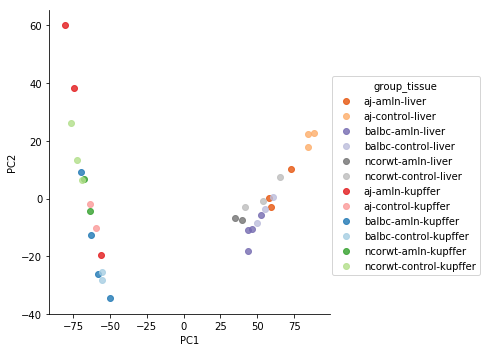

In [9]:
sns.lmplot('PC1', 'PC2', tpm_pca_df, fit_reg=False, hue='group_tissue', palette=color_dict_tissue)

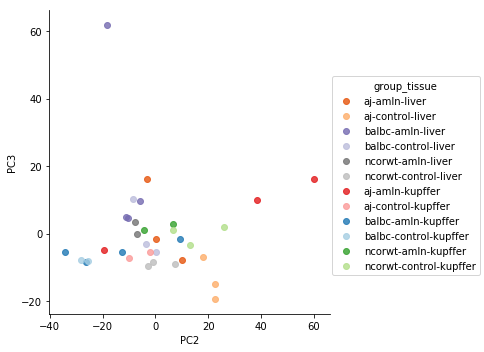

In [10]:
sns.lmplot('PC2', 'PC3', tpm_pca_df, fit_reg=False, hue='group_tissue', palette=color_dict_tissue)

### Consider implementing a 3D plot below
____
**TBD**

## Tissue specific PCA

In [11]:
def df_col_subset(x, id_str):
    import pandas as pd
    import re
    '''Returns pandas dataframe with only columns containing id_str'''
    return x[x.columns[pd.Series(x.columns).str.contains(id_str, flags=re.IGNORECASE)]]

### Whole Liver

In [12]:
# standardize matrix, mean=0, std=1
l_tpm = df_col_subset(tpm_mat, 'Liver')
l_tpm_std = StandardScaler().fit_transform(l_tpm) # scale data
# run PCA
l_pca = PCA(n_components=2)
l_tpm_pca = l_pca.fit_transform(l_tpm_std.T)
#create df for plotting
l_tpm_pca_df = pd.DataFrame(l_tpm_pca, columns=['PC1', 'PC2'],
        index=samplesDF[samplesDF.sample_type=='liver'].group_tissue).reset_index()

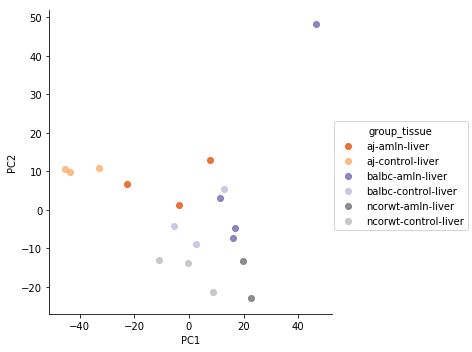

In [13]:
sns.lmplot('PC1', 'PC2', l_tpm_pca_df, fit_reg=False,
           hue='group_tissue', palette=color_dict_tissue)

### Kupffer Cells

In [14]:
# standardize matrix, mean=0, std=1
k_tpm = df_col_subset(tpm_mat, 'Kupffer')
k_tpm_std = StandardScaler().fit_transform(k_tpm) # scale data
# run PCA
k_pca = PCA(n_components=2)
k_tpm_pca = k_pca.fit_transform(k_tpm_std.T)
#create df for plotting
k_tpm_pca_df = pd.DataFrame(k_tpm_pca, columns=['PC1', 'PC2'],
        index=samplesDF[samplesDF.sample_type=='kupffer'].group_tissue).reset_index()

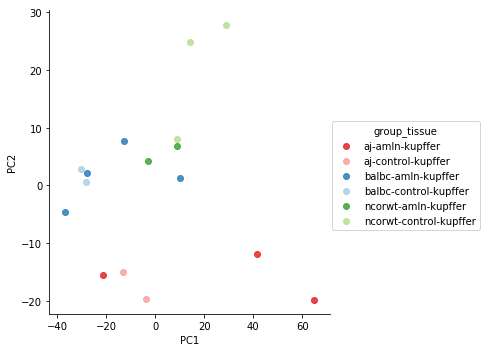

In [15]:
sns.lmplot('PC1', 'PC2', k_tpm_pca_df, fit_reg=False, hue='group_tissue', palette=color_dict_tissue)

### Heirachal clustering of samples

/home/h1bennet/anaconda3/envs/rnaseq/lib/python3.6/site-packages/seaborn/matrix.py:603: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


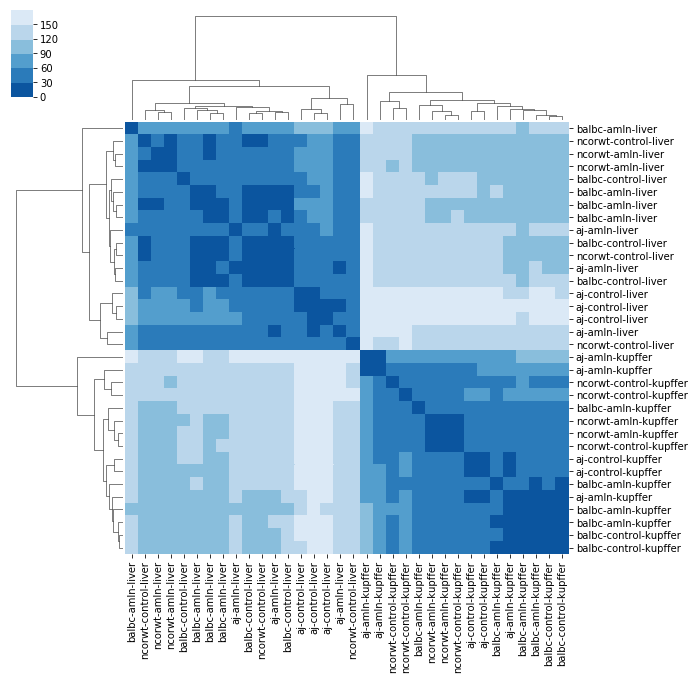

In [16]:
# calculate euclidean distance between samples
from scipy.spatial import distance
tpm_dist = pd.DataFrame(distance.squareform(distance.pdist(tpm_std.T, 'euclidean')),
                        columns = list(samplesDF.group_tissue),
                        index = list(samplesDF.group_tissue))
# plot values using sns clustermap - ignore error as we know we are putting in a distance mat
g = sns.clustermap(tpm_dist, cmap=sns.color_palette("Blues_r"))

## Differential Analysis (DESeq2)

Prep data for importing into R

In [17]:
# import the raw count file
raw_counts_file = '/rnaseq_matrix_genes_raw.txt'
counts_df = pd.read_csv(outdir + raw_counts_file, sep='\t')

# create gene name column
counts_df['Gene'] = pd.Series([x.split('|')[0] for x in counts_df['Annotation/Divergence']])

# clean up columns
counts_df.columns = pd.Series(counts_df.columns)\
        .str.split(r" \(").str[0]\
        .str.split('/.*/').str[-1]
counts_df = counts_df.set_index('Transcript/RepeatID')

# subset just the samples
counts_mat_l = df_col_subset(df_col_subset(counts_df, 'liver'), 'aj|balb|ncor')
counts_mat_k = df_col_subset(df_col_subset(counts_df, 'kupffer'), 'aj|balb|ncor')

#### Write the data for DESeq2

Liver

In [18]:
# raw count matrix for DESeq
liver_raw_counts_file = raw_counts_file.replace('.txt', '_liver_mat_deseq.txt')                                    
if not os.path.isfile(outdir + liver_raw_counts_file):
    counts_mat_l.to_csv(outdir + liver_raw_counts_file, sep='\t')
    
# Column Data Information for DESeq
col_data_k = samplesDF.loc[samplesDF.sample_type=='liver', ['subject', 'strain', 'diet', 'sample_type']]
col_data_k = col_data_k.set_index('subject')
liver_col_file = raw_counts_file.replace('.txt', 'liver_col_info.txt')
if not os.path.isfile(outdir + liver_col_file):
    col_data_k.to_csv(outdir + liver_col_file, sep='\t')

In [19]:
# raw count matrix for DESeq
kupffer_raw_counts_file = raw_counts_file.replace('.txt', '_kupffer_mat_deseq.txt')                                   
if not os.path.isfile(outdir + kupffer_raw_counts_file):
    counts_mat_l.to_csv(outdir + kupffer_raw_counts_file, sep='\t')

# Column Data Information for DESeq
col_data_l = samplesDF.loc[samplesDF.sample_type=='kupffer', ['subject', 'strain', 'diet', 'sample_type']]
col_data_l = col_data_l.set_index('subject')
kupffer_col_file = raw_counts_file.replace('.txt', 'kupffer_col_info.txt')
if not os.path.isfile(outdir + kupffer_col_file):
    col_data_l.to_csv(outdir + kupffer_col_file, sep='\t')

In [22]:
%%R -i counts_mat_l,col_data_l
# load DESeq
library("DESeq2")

/home/h1bennet/anaconda3/envs/rnaseq/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: S4Vectors

  warnings.warn(x, RRuntimeWarning)
/home/h1bennet/anaconda3/envs/rnaseq/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: stats4

  warnings.warn(x, RRuntimeWarning)
/home/h1bennet/anaconda3/envs/rnaseq/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: BiocGenerics

  warnings.warn(x, RRuntimeWarning)
/home/h1bennet/anaconda3/envs/rnaseq/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: parallel

  warnings.warn(x, RRuntimeWarning)
/home/h1bennet/anaconda3/envs/rnaseq/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 
Attaching package: ‘BiocGenerics’


  warnings.warn(x, RRuntimeWarning)
/home/h1bennet/anaconda3/envs/rnaseq/lib/python3.6/site-packa

#### lets look at pathway activity with just heatmaps (like in Buscher et al 2017)
* fatty acid synthesis pathway
* cholesterol export pathway
* TLR pathway
* NFkB pathway

In [82]:
tlr = pd.read_csv('/home/h1bennet/liverStrains/data/mouse/gsea_kegg_tlr.txt',
                  sep='\t', comment='>')

TypeError: object of type 'float' has no len()